<div style="text-align: center;">
    <hr>
    <h2>Prapemrosesan & Rekayasa Data - IBDA3111</h2>
    <h3>Data Transforms - Assignment</h3>
    <h4>Victor Chendra - <b>202000338</b></h4>
    <hr>
</div>
Dataset source: <a href="https://data.jakarta.go.id/dataset/kecepatan-rata-rata-di-41-koridor-jalan-utama-pada-jam-sibuk-tahun-2019-kpi">data.jakarta.go.id</a>

<h4> Important!!</h4>
Ditemukan bahwa pada dataset april, ada nama kolom dengan huruf besar (pencapaian_Waktu_tempuh (berbeda sendiri)). Jadi ketika dicoba untuk menggabungkannya (concat), kita akan mendapatkan kolom tambahan. <br> <br>

Jadi solusinya saya rename colomnnya secara langsung di file csv nya (hard code) menjadi "pencapaian_waktu_tempuh". Sehingga kita akan tetap mendapatkan jumlah kolom dataset yang sama dengan semuanya.


In [1]:
# Import Library needed

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from prettytable import PrettyTable
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


In [2]:
# Concat all 12 dataset into only 1 dataframe (combine)
def load_dataset():
    januari = pd.read_csv("kecepatan-rata-rata-di-41-koridor-jalan-utama-pada-jam-sibuk-januari-2019.csv")
    februari = pd.read_csv("februari-2019-data-kecepatan-rata-rata-di-41-koridor-jalan-utama-pada-jam-sibuk.csv")
    maret = pd.read_csv("maret-2019-data-kecepatan-rata-rata-di-41-koridor-jalan-utama-pada-jam-sibuk.csv")
    april = pd.read_csv("april-2019-data-kecepatan-rata-rata-di-41-koridor-jalan-utama-pada-jam-sibuk.csv")
    mei = pd.read_csv("mei-2019-data-kecepatan-rata-rata-di-41-koridor-jalan-utama-pada-jam-sibuk.csv")
    juni = pd.read_csv("juni-2019-data-kecepatan-rata-rata-di-41-koridor-jalan-utama-pada-jam-sibuk.csv")
    juli = pd.read_csv("juli-2019-data-kecepatan-rata-rata-di-41-koridor-jalan-utama-pada-jam-sibuk.csv")
    agustus = pd.read_csv("agustus-2019-data-kecepatan-rata-rata-di-41-koridor-jalan-utama-pada-jam-sibuk.csv")
    september = pd.read_csv("september-2019-data-kecepatan-rata-rata-di-41-koridor-jalan-utama-pada-jam-sibuk.csv")
    oktober = pd.read_csv("oktober-2019-data-kecepatan-rata-rata-di-41-koridor-jalan-utama-pada-jam-sibuk.csv")
    november = pd.read_csv("november-2019-data-kecepatan-rata-rata-di-41-koridor-jalan-utama-pada-jam-sibuk.csv")
    desember = pd.read_csv("desember-2019-data-kecepatan-rata-rata-di-41-koridor-jalan-utama-pada-jam-sibuk.csv")

    df = pd.concat([januari, februari, maret, april, mei, juni, juli, agustus, september, oktober, november, desember], ignore_index=True)
    return df, df.columns

# define function to swap columns
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

# Load dataset
df, column_name = load_dataset()
column_name = list(column_name)

# swap "pencapaian_kecepatan" and "pencapaian_waktu_tempuh"
df = swap_columns(df, 'pencapaian_kecepatan', 'pencapaian_waktu_tempuh')
column_name[-2], column_name[-1] = column_name[-1], column_name[-2]

# Save
unique_waktu = len(df["waktu"].unique())
unique_arah = len(df["arah"].unique())
unique_koridor = len(df["koridor"].unique())

# Display dataset
display(df.head(3))
print(df.shape)


,waktu,arah,koridor,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh,pencapaian_kecepatan
0,pagi,Selatan - Pusat,Lenteng Agung - Ps. Minggu - Supomo - dr. Saha...,20.5,19.62,57.43,22.70,63.83,22.98
1,pagi,Selatan - Pusat,Cilandak KKO - Warung Buncit - Mampang Prapata...,20.5,13.36,39.10,25.43,37.71,22.98
2,pagi,Selatan - Pusat,Pangeran Antasari - Prapanca - Iskandarsyah - ...,20.5,11.13,32.58,27.54,26.99,22.98


(986, 9)


#### Clean dataset

##### 1. Drop duplicated rows

In [3]:
dups = df.duplicated()
print(f"Duplicated rows:")
print(dups.any())
print(df[dups])

print(f"\nShape before delete:  {df.shape}")
df.drop_duplicates(inplace=True)
print(f"Shape after delete :  {df.shape}\n")


Duplicated rows:
True
    waktu arah koridor  target_kecepatan  jarak  target_waktu_tempuh  \
411   NaN  NaN     NaN               NaN    NaN                  NaN   

     pencapaian_kecepatan_per_koridor  pencapaian_waktu_tempuh  \
411                               NaN                      NaN   

     pencapaian_kecepatan  
411                   NaN  

Shape before delete:  (986, 9)
Shape after delete :  (985, 9)



Why drop the duplicated rows? Because we don't want our model become bias

##### 2. Drop rows that contain NaN values

In [4]:
# Let's check how many NaN value in each column
print(f"Total Nan Value:")
print(df.isnull().sum())


Total Nan Value:
waktu                                1
arah                                 1
koridor                              1
target_kecepatan                    42
jarak                                1
target_waktu_tempuh                  1
pencapaian_kecepatan_per_koridor     1
pencapaian_waktu_tempuh              1
pencapaian_kecepatan                 1
dtype: int64


In [5]:
# Drop rows that contain NaN values
print(f"Shape before: {df.shape}")
df.dropna(inplace=True)
print(f"Shape  after: {df.shape}\n")

# Let's check how many NaN value in each column
print(f"Total Nan Value:")
print(df.isnull().sum())


Shape before: (985, 9)
Shape  after: (943, 9)

Total Nan Value:
waktu                               0
arah                                0
koridor                             0
target_kecepatan                    0
jarak                               0
target_waktu_tempuh                 0
pencapaian_kecepatan_per_koridor    0
pencapaian_waktu_tempuh             0
pencapaian_kecepatan                0
dtype: int64


Why drop the NaN value rows? Because our model cannot calculate when there is a NaN value.

#### There is something wrong...

Terdapat typo pada datasetnya (categorical columns)

In [6]:
# Let's check unique values on categorical columns (except column index 2)
for i in range(2):
    print(df.iloc[:, i].unique())


['pagi' 'sore' 'Pagi' 'Sore']
['Selatan - Pusat' 'Timur - Pusat' 'Utara - Pusat' 'Barat - Pusat'
 'Pusat - Selatan' 'Pusat - Timur' 'Pusat - Utara' 'Pusat - Barat'
 'Utara - Pusa' 'selatan - Pusat']


↑ ↑ Typo with same meaning: <br>
<ul>
    <li>"pagi" & "Pagi"</li>
    <li>"sore" & "Sore"</li>
    <li>"Utara - Pusat" with "Utara - Pusa" </li>
    <li>"Selatan - Pusat" with "selatan - Pusat"</li>
</ul>
<br>
Let's fix this!

In [7]:
# Replace/update typo values
df[column_name[0]] = df[column_name[0]].replace(["pagi"], "Pagi")
df[column_name[0]] = df[column_name[0]].replace(["sore"], "Sore")

df[column_name[1]] = df[column_name[1]].replace(["Utara - Pusa"], "Utara - Pusat")
df[column_name[1]] = df[column_name[1]].replace(["selatan - Pusat"], "Selatan - Pusat")


In [8]:
# Let's check if it's already updated
for i in range(2):
    print(df.iloc[:, i].unique())


['Pagi' 'Sore']
['Selatan - Pusat' 'Timur - Pusat' 'Utara - Pusat' 'Barat - Pusat'
 'Pusat - Selatan' 'Pusat - Timur' 'Pusat - Utara' 'Pusat - Barat']


DONE ✅

#### 1. Hitung akurasi model linear regression (cross validation) tanpa menggunakan scaling maupun encoder

In [9]:
# Define Linear Regression function
def do_linear_regression(df):
    # Split X, y
    df = df.values
    X, y = df[:, :-1], df[:, -1]

    # Define LR model, Pipeline, KFold
    model = LinearRegression()
    pipeline = Pipeline(steps=[('m', model)])
    cv = KFold(n_splits=15, shuffle=True, random_state=42)
    
    # Evaluate the pipeline (It return an array with lenght of n_splits ↑)
    accuracy = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
    mean_cross_val = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
    std_cross_val = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
    
    # Calculate
    accuracy = np.mean(accuracy)
    mean_cross_val = (np.mean(np.absolute(mean_cross_val)))
    std_cross_val = np.std(std_cross_val)
    
    # print results
    print(f"Accuracy LR    = {accuracy*100: .4f}%")
    print(f"Cross val Mean = {mean_cross_val: .4f}")
    print(f"Cross val Std  = {std_cross_val: .4f}")
    
    return (accuracy, mean_cross_val, std_cross_val)


In [10]:
# Display dataset
display(df.iloc[:, 3:].head(3))
print(df.iloc[:, 3:].shape, "\n")

# Do linear regression
pure_score = do_linear_regression(df=df.iloc[:, 3:])


,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh,pencapaian_kecepatan
0,20.5,19.62,57.43,22.70,63.83,22.98
1,20.5,13.36,39.10,25.43,37.71,22.98
2,20.5,11.13,32.58,27.54,26.99,22.98


(943, 6) 

Accuracy LR    =  64.0561%
Cross val Mean =  2.0215
Cross val Std  =  0.1775


#### 2. Buatlah histogram untuk tiga cara: (normalisasi, standarisasi, dan robust scaler) untuk fitur numerik, lalu hitunglah akurasi model regresi linear (gunakan cross validation) untuk tiga cara ini (dengan memakai fitur numerik saja)

In [11]:
# Define scaler function
def normalization(df, min_scale: int = 0, max_scale: int = 1):
    scaled = MinMaxScaler(feature_range=(min_scale, max_scale)).fit_transform(df)
    return scaled

def standardization(df):
    scaled = StandardScaler().fit_transform(df)
    return scaled

def robust_scaler(df):
    scaled = RobustScaler().fit_transform(df)
    return scaled

# Define function for plotting histogram
def histogram(df, set_title: str):
    figure, ax = plt.subplots(2,3, constrained_layout=True, figsize=(18, 7))

    # Set title for overall plot
    figure.suptitle(set_title) # or plt.suptitle('Main title')

    for i in range(df.shape[1]):
        plt.subplot(2, 3, i+1)
        axes = sns.histplot(data=df, x=df.columns[i], kde=True)
        axes.lines[0].set_color('crimson')

    return

##### 1. Normalization

In [12]:
# Normalization
scaled = normalization(df.iloc[:, 3:], 0, 1)
df1_norm = pd.DataFrame(scaled, columns=column_name[3:])

# Before normalization
display(df.iloc[:, 3:].head(3))
print(df.iloc[:, 3:].shape)

# After normalization
display(df1_norm.head(3))
print(df1_norm.shape, "\n")

# Do linear regression
nrm_score = do_linear_regression(df=df1_norm)


,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh,pencapaian_kecepatan
0,20.5,19.62,57.43,22.70,63.83,22.98
1,20.5,13.36,39.10,25.43,37.71,22.98
2,20.5,11.13,32.58,27.54,26.99,22.98


(943, 6)


,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh,pencapaian_kecepatan
0,0.3,0.875392,0.791712,0.224421,0.723518,0.284382
1,0.3,0.384796,0.391930,0.301583,0.347582,0.284382
2,0.3,0.210031,0.249727,0.361221,0.193293,0.284382


(943, 6) 

Accuracy LR    =  64.0561%
Cross val Mean =  0.0942
Cross val Std  =  0.0083


##### 2. Standardization

In [13]:
# Standardization
scaled = standardization(df.iloc[:, 3:])
df1_stdz = pd.DataFrame(scaled, columns=column_name[3:])

# Before standardization
display(df.iloc[:, 3:].head(3))
print(df.iloc[:, 3:].shape)

# After standardization
display(df1_stdz.head(3))
print(df1_stdz.shape, "\n")

# Do linear regression
stdz_score = do_linear_regression(df=df1_stdz)


,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh,pencapaian_kecepatan
0,20.5,19.62,57.43,22.70,63.83,22.98
1,20.5,13.36,39.10,25.43,37.71,22.98
2,20.5,11.13,32.58,27.54,26.99,22.98


(943, 6)


,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh,pencapaian_kecepatan
0,-0.614791,1.511478,1.665935,-0.587928,1.718837,-0.683991
1,-0.614791,-0.549380,-0.377027,-0.090900,-0.282108,-0.683991
2,-0.614791,-1.283520,-1.103711,0.293251,-1.103322,-0.683991


(943, 6) 

Accuracy LR    =  64.0561%
Cross val Mean =  0.4687
Cross val Std  =  0.0412


##### 3. Robust Scaler

In [14]:
# Robust Scaler
scaled = robust_scaler(df.iloc[:, 3:])
df1_rs = pd.DataFrame(scaled, columns=column_name[3:])

# Before Robust Scaler
display(df.iloc[:, 3:].head(3))
print(df.iloc[:, 3:].shape)

# After Robust Scaler
display(df1_rs.head(3))
print(df1_rs.shape, "\n")

# Do linear regression
RS_score = do_linear_regression(df=df1_rs)


,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh,pencapaian_kecepatan
0,20.5,19.62,57.43,22.70,63.83,22.98
1,20.5,13.36,39.10,25.43,37.71,22.98
2,20.5,11.13,32.58,27.54,26.99,22.98


(943, 6)


,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh,pencapaian_kecepatan
0,-0.333333,1.262755,1.394429,-0.353615,1.262146,-0.362663
1,-0.333333,-0.334184,-0.252471,0.037223,-0.132408,-0.362663
2,-0.333333,-0.903061,-0.838275,0.339298,-0.704752,-0.362663


(943, 6) 

Accuracy LR    =  64.0561%
Cross val Mean =  0.3093
Cross val Std  =  0.0272


##### Histogram

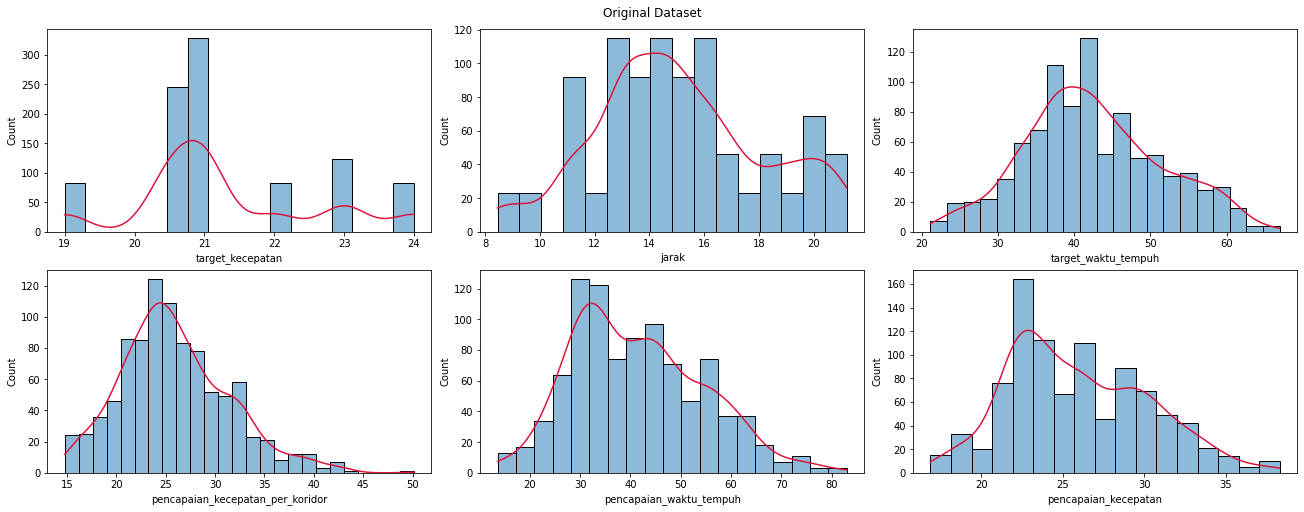

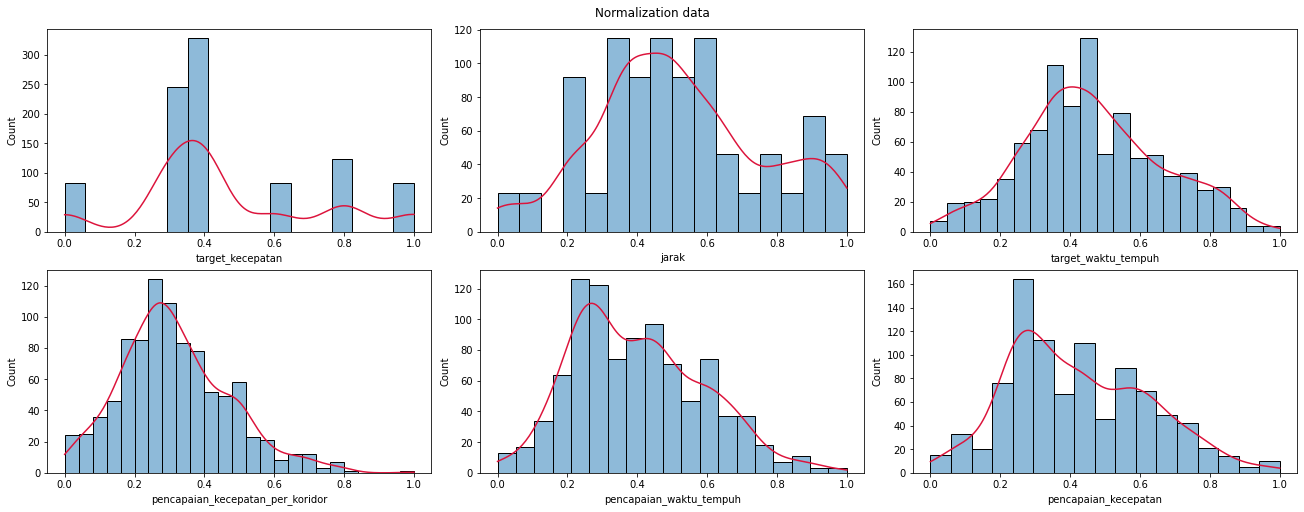

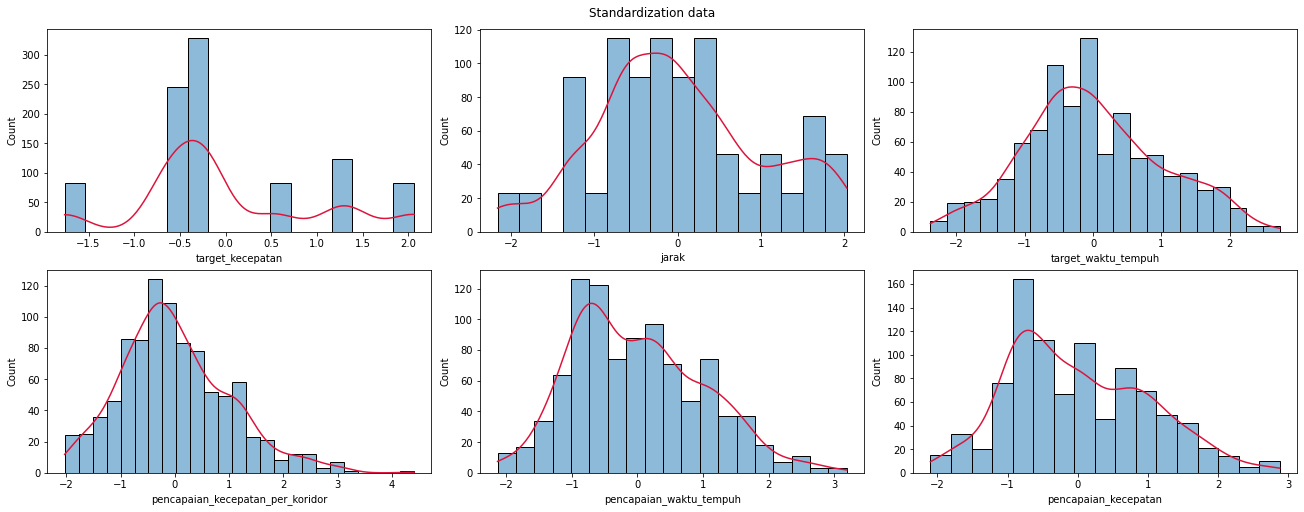

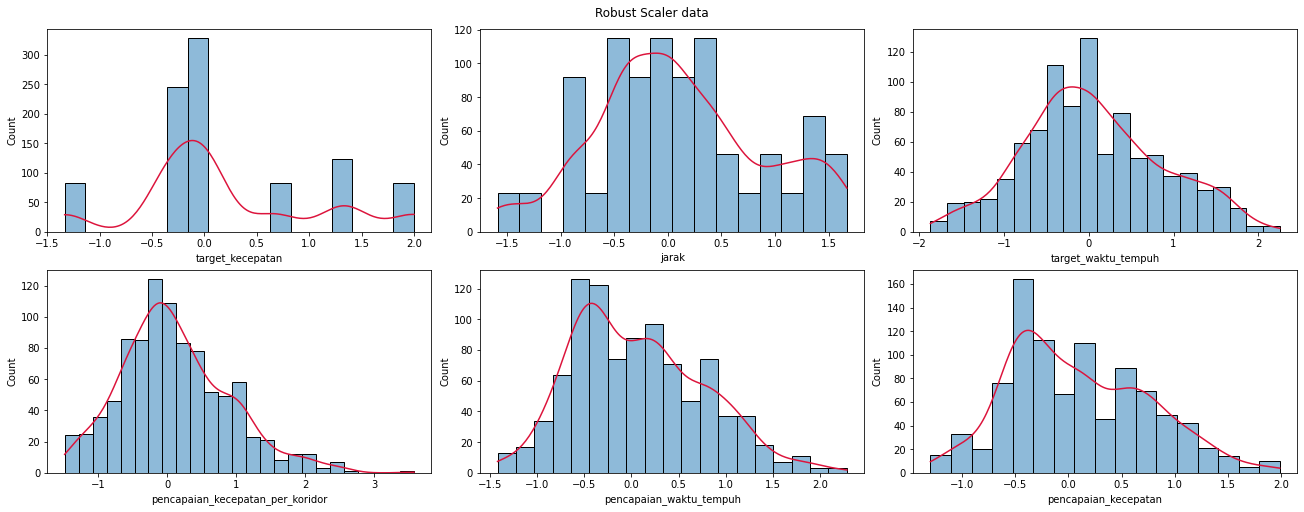

In [15]:
histogram(df.iloc[:, 3:], "Original Dataset")
histogram(df1_norm, "Normalization data")
histogram(df1_stdz, "Standardization data")
histogram(df1_rs, "Robust Scaler data")


##### Notes:
Saya telah mencoba 3 jenis scaling diatas terhadap dataset, namun tidak untuk variabel outputnya (y) atau scaling hanya pada variabel input. Namun hasil accuracy yang dihasilkan sama persis, kecuali nilai MAE nya, dimana nilainya sama dengan nilai MAE jika tidak melakukan scaling sama sekali (nilai MAE sama nilai MAR pada no 1) 

#### 3. Gunakan onehot encoder dan ordinal encoder terhadap dataset untuk fitur kategorial. Lalu hitunglah akurasi model regresi linear (gunakan cross validation) untuk dua cara ini (dengan memakai fitur kategorial saja)

In [16]:
def one_hot_encoding(df):
    df = df.copy()

    encoded = OneHotEncoder(sparse=False).fit_transform(df.iloc[:, :3])
    encoded = pd.DataFrame(encoded)

    encoded.reset_index(inplace=True)
    df.reset_index(inplace=True)
    
    encoded.drop(["index"], axis=1, inplace=True)
    df.drop(["index"], axis=1, inplace=True)

    return encoded.join(df.iloc[:, 3:])

def ordinal_encoder(df):
    df = df.copy()

    encoded = OrdinalEncoder().fit_transform(df.iloc[:, :3])
    encoded = pd.DataFrame(encoded, columns=column_name[:3])
    
    encoded.reset_index(inplace=True)
    df.reset_index(inplace=True)
    
    encoded.drop(["index"], axis=1, inplace=True)
    df.drop(["index"], axis=1, inplace=True)

    return encoded.join(df.iloc[:, 3:])


##### 1. One hot encoding

In [17]:
# Before one hot encoding
display(df.head(3))
print(df.shape)

# One hot encoding
df_onehot = one_hot_encoding(df)

# After one hot encoding
display(df_onehot.head())
print(df_onehot.shape)

# Do linear regression
one_hot_score = do_linear_regression(df=df_onehot)


,waktu,arah,koridor,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh,pencapaian_kecepatan
0,Pagi,Selatan - Pusat,Lenteng Agung - Ps. Minggu - Supomo - dr. Saha...,20.5,19.62,57.43,22.70,63.83,22.98
1,Pagi,Selatan - Pusat,Cilandak KKO - Warung Buncit - Mampang Prapata...,20.5,13.36,39.10,25.43,37.71,22.98
2,Pagi,Selatan - Pusat,Pangeran Antasari - Prapanca - Iskandarsyah - ...,20.5,11.13,32.58,27.54,26.99,22.98


(943, 9)


,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh,pencapaian_kecepatan
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,20.5,19.62,57.43,22.70,63.83,22.98
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,20.5,13.36,39.10,25.43,37.71,22.98
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,20.5,11.13,32.58,27.54,26.99,22.98
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,20.5,16.25,47.56,22.20,50.82,22.98
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,20.5,15.87,46.45,25.99,42.06,22.98


(943, 57)
Accuracy LR    =  82.1780%
Cross val Mean =  1.3533
Cross val Std  =  0.1518


##### 2. Ordinal encoder

In [18]:
# Before ordinal encoding
display(df.head(3))
print(df.shape)

# Ordinal encoding
df_ordinal = ordinal_encoder(df)

# After Ordinal encoding
display(df_ordinal.head())
print(df_ordinal.shape)

# Do linear regression
ordinal_score = do_linear_regression(df=df_ordinal)


,waktu,arah,koridor,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh,pencapaian_kecepatan
0,Pagi,Selatan - Pusat,Lenteng Agung - Ps. Minggu - Supomo - dr. Saha...,20.5,19.62,57.43,22.70,63.83,22.98
1,Pagi,Selatan - Pusat,Cilandak KKO - Warung Buncit - Mampang Prapata...,20.5,13.36,39.10,25.43,37.71,22.98
2,Pagi,Selatan - Pusat,Pangeran Antasari - Prapanca - Iskandarsyah - ...,20.5,11.13,32.58,27.54,26.99,22.98


(943, 9)


,waktu,arah,koridor,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh,pencapaian_kecepatan
0,0.0,5.0,16.0,20.5,19.62,57.43,22.70,63.83,22.98
1,0.0,5.0,0.0,20.5,13.36,39.10,25.43,37.71,22.98
2,0.0,5.0,25.0,20.5,11.13,32.58,27.54,26.99,22.98
3,0.0,5.0,29.0,20.5,16.25,47.56,22.20,50.82,22.98
4,0.0,5.0,26.0,20.5,15.87,46.45,25.99,42.06,22.98


(943, 9)
Accuracy LR    =  69.1674%
Cross val Mean =  1.9023
Cross val Std  =  0.1592


#### 4. Gunakan kombinasi transformasi data apapun (lebih dari 2) untuk semua fitur. Lalu hitunglah akurasi model regresi linear (gunakan cross validation) untuk cara ini (dengan memakai semua fitur yang sudah tertransformasi)

#### A. Encoding - Scaling

##### 1. One hot encoding - Normalization

In [19]:
# One hot encoding x normalization
ohe_x_norm = normalization(df_onehot, 0, 1)
ohe_x_norm = pd.DataFrame(ohe_x_norm, columns=df_onehot.columns)

# Display dataset
display(ohe_x_norm.head())
print(ohe_x_norm.shape)

# Do linear regression
ohe_x_norm_score = do_linear_regression(df=ohe_x_norm)


c:\Python 3.10.2\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Python 3.10.2\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh,pencapaian_kecepatan
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.3,0.875392,0.791712,0.224421,0.723518,0.284382
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.3,0.384796,0.391930,0.301583,0.347582,0.284382
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.3,0.210031,0.249727,0.361221,0.193293,0.284382
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.3,0.611285,0.576445,0.210288,0.536269,0.284382
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.3,0.581505,0.552236,0.317411,0.410190,0.284382


(943, 57)
Accuracy LR    =  82.8621%
Cross val Mean =  0.0620
Cross val Std  =  0.0067


##### 2. One hot encoding - Standardization

In [20]:
# One hot encoding x standardization
ohe_x_stdz = standardization(df_onehot)
ohe_x_stdz = pd.DataFrame(ohe_x_stdz, columns=df_onehot.columns)

# Display dataset
display(ohe_x_stdz.head())
print(ohe_x_stdz.shape)

# Do linear regression
ohe_x_stdz_score = do_linear_regression(df=ohe_x_stdz)


c:\Python 3.10.2\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Python 3.10.2\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh,pencapaian_kecepatan
0,0.957427,-0.957427,-0.328798,-0.328798,-0.414039,-0.372678,-0.372678,2.203893,-0.372678,-0.372678,...,-0.158114,-0.158114,-0.158114,-0.158114,-0.614791,1.511478,1.665935,-0.587928,1.718837,-0.683991
1,0.957427,-0.957427,-0.328798,-0.328798,-0.414039,-0.372678,-0.372678,2.203893,-0.372678,-0.372678,...,-0.158114,-0.158114,-0.158114,-0.158114,-0.614791,-0.549380,-0.377027,-0.090900,-0.282108,-0.683991
2,0.957427,-0.957427,-0.328798,-0.328798,-0.414039,-0.372678,-0.372678,2.203893,-0.372678,-0.372678,...,-0.158114,-0.158114,-0.158114,-0.158114,-0.614791,-1.283520,-1.103711,0.293251,-1.103322,-0.683991
3,0.957427,-0.957427,-0.328798,-0.328798,-0.414039,-0.372678,-0.372678,2.203893,-0.372678,-0.372678,...,-0.158114,-0.158114,-0.158114,-0.158114,-0.614791,0.402038,0.565878,-0.678959,0.722195,-0.683991
4,0.957427,-0.957427,-0.328798,-0.328798,-0.414039,-0.372678,-0.372678,2.203893,-0.372678,-0.372678,...,-0.158114,-0.158114,-0.158114,-0.158114,-0.614791,0.276938,0.442164,0.011055,0.051128,-0.683991


(943, 57)
Accuracy LR    =  81.9174%
Cross val Mean =  0.3178
Cross val Std  =  0.0330


##### 3. One hot encoding - Robust scaler


In [21]:
# One hot encoding x robust scaler
ohe_x_RS = robust_scaler(df_onehot)
ohe_x_RS = pd.DataFrame(ohe_x_RS, columns=df_onehot.columns)

# Display dataset
display(ohe_x_RS.head())
print(ohe_x_RS.shape)

# Do linear regression
ohe_x_RS_score = do_linear_regression(df=ohe_x_RS)


c:\Python 3.10.2\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Python 3.10.2\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh,pencapaian_kecepatan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.333333,1.262755,1.394429,-0.353615,1.262146,-0.362663
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.333333,-0.334184,-0.252471,0.037223,-0.132408,-0.362663
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.333333,-0.903061,-0.838275,0.339298,-0.704752,-0.362663
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.333333,0.403061,0.507637,-0.425197,0.567539,-0.362663
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.333333,0.306122,0.407907,0.117394,0.099840,-0.362663


(943, 57)
Accuracy LR    =  82.9257%
Cross val Mean =  0.2031
Cross val Std  =  0.0227


##### 4. Ordinal encoder - Normalization

In [22]:
# Ordinal encoder x Normalization
ordinal_x_norm = normalization(df_ordinal)
ordinal_x_norm = pd.DataFrame(ordinal_x_norm, columns=df_ordinal.columns)

# Display dataset
display(ordinal_x_norm.head())
print(ordinal_x_norm.shape)

# Do linear regression
ordinal_x_norm_score = do_linear_regression(df=ordinal_x_norm)


,waktu,arah,koridor,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh,pencapaian_kecepatan
0,0.0,0.714286,0.400,0.3,0.875392,0.791712,0.224421,0.723518,0.284382
1,0.0,0.714286,0.000,0.3,0.384796,0.391930,0.301583,0.347582,0.284382
2,0.0,0.714286,0.625,0.3,0.210031,0.249727,0.361221,0.193293,0.284382
3,0.0,0.714286,0.725,0.3,0.611285,0.576445,0.210288,0.536269,0.284382
4,0.0,0.714286,0.650,0.3,0.581505,0.552236,0.317411,0.410190,0.284382


(943, 9)
Accuracy LR    =  69.1674%
Cross val Mean =  0.0887
Cross val Std  =  0.0074


##### 5. Ordinal encoder - Standardization

In [23]:
# Ordinal encoder x Standardization
ordinal_x_stdz = standardization(df_ordinal)
ordinal_x_stdz = pd.DataFrame(ordinal_x_stdz, columns=df_ordinal.columns)

# Display dataset
display(ordinal_x_stdz.head())
print(ordinal_x_stdz.shape)

# Do linear regression
ordinal_x_stdz_score = do_linear_regression(df=ordinal_x_stdz)


,waktu,arah,koridor,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh,pencapaian_kecepatan
0,-0.957427,0.60104,-0.338062,-0.614791,1.511478,1.665935,-0.587928,1.718837,-0.683991
1,-0.957427,0.60104,-1.690309,-0.614791,-0.549380,-0.377027,-0.090900,-0.282108,-0.683991
2,-0.957427,0.60104,0.422577,-0.614791,-1.283520,-1.103711,0.293251,-1.103322,-0.683991
3,-0.957427,0.60104,0.760639,-0.614791,0.402038,0.565878,-0.678959,0.722195,-0.683991
4,-0.957427,0.60104,0.507093,-0.614791,0.276938,0.442164,0.011055,0.051128,-0.683991


(943, 9)
Accuracy LR    =  69.1674%
Cross val Mean =  0.4411
Cross val Std  =  0.0369


##### 6. Ordinal encoder - Robust scaler

In [24]:
# Ordinal encoder x robust scaler
ordinal_x_RS = robust_scaler(df_ordinal)
ordinal_x_RS = pd.DataFrame(ordinal_x_RS, columns=df_ordinal.columns)

# Display dataset
display(ordinal_x_RS.head())
print(ordinal_x_RS.shape)

# Do linear regression
ordinal_x_RS_score = do_linear_regression(df=ordinal_x_RS)


,waktu,arah,koridor,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh,pencapaian_kecepatan
0,0.0,0.333333,-0.20,-0.333333,1.262755,1.394429,-0.353615,1.262146,-0.362663
1,0.0,0.333333,-1.00,-0.333333,-0.334184,-0.252471,0.037223,-0.132408,-0.362663
2,0.0,0.333333,0.25,-0.333333,-0.903061,-0.838275,0.339298,-0.704752,-0.362663
3,0.0,0.333333,0.45,-0.333333,0.403061,0.507637,-0.425197,0.567539,-0.362663
4,0.0,0.333333,0.30,-0.333333,0.306122,0.407907,0.117394,0.099840,-0.362663


(943, 9)
Accuracy LR    =  69.1674%
Cross val Mean =  0.2911
Cross val Std  =  0.0244


#### B. Scaling - Encoding

##### 1. Normalization - One hot encoding

In [25]:
# Normalization - OHE
norm_x_ohe = df_onehot.iloc[:, :-df1_norm.shape[1]]
norm_x_ohe = norm_x_ohe.join(df1_norm)

# Display dataset
display(norm_x_ohe.head())
print(norm_x_ohe.shape)

# Do linear regression
norm_x_ohe_score = do_linear_regression(df=norm_x_ohe)


,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh,pencapaian_kecepatan
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.3,0.875392,0.791712,0.224421,0.723518,0.284382
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.3,0.384796,0.391930,0.301583,0.347582,0.284382
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.3,0.210031,0.249727,0.361221,0.193293,0.284382
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.3,0.611285,0.576445,0.210288,0.536269,0.284382
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.3,0.581505,0.552236,0.317411,0.410190,0.284382


(943, 57)
Accuracy LR    =  82.8621%
Cross val Mean =  0.0620
Cross val Std  =  0.0067


##### 2. Standardization - One hot encoding

In [26]:
# Standardization - OHE
stdz_x_ohe = df_onehot.iloc[:, :-df1_stdz.shape[1]]
stdz_x_ohe = stdz_x_ohe.join(df1_stdz)

# Display dataset
display(stdz_x_ohe.head())
print(stdz_x_ohe.shape)

# Do linear regression
stdz_x_ohe_score = do_linear_regression(df=stdz_x_ohe)


,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh,pencapaian_kecepatan
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.614791,1.511478,1.665935,-0.587928,1.718837,-0.683991
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.614791,-0.549380,-0.377027,-0.090900,-0.282108,-0.683991
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.614791,-1.283520,-1.103711,0.293251,-1.103322,-0.683991
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.614791,0.402038,0.565878,-0.678959,0.722195,-0.683991
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.614791,0.276938,0.442164,0.011055,0.051128,-0.683991


(943, 57)
Accuracy LR    =  82.8384%
Cross val Mean =  0.3079
Cross val Std  =  0.0322


##### 3. Robust scaler - One hot encoding

In [27]:
# Robust scaler - OHE
rs_x_ohe = df_onehot.iloc[:, :-df1_rs.shape[1]]
rs_x_ohe = rs_x_ohe.join(df1_rs)

# Display dataset
display(rs_x_ohe.head())
print(rs_x_ohe.shape)

# Do linear regression
rs_x_ohe_score = do_linear_regression(df=rs_x_ohe)


,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh,pencapaian_kecepatan
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.333333,1.262755,1.394429,-0.353615,1.262146,-0.362663
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.333333,-0.334184,-0.252471,0.037223,-0.132408,-0.362663
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.333333,-0.903061,-0.838275,0.339298,-0.704752,-0.362663
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.333333,0.403061,0.507637,-0.425197,0.567539,-0.362663
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.333333,0.306122,0.407907,0.117394,0.099840,-0.362663


(943, 57)
Accuracy LR    =  82.9088%
Cross val Mean =  0.2029
Cross val Std  =  0.0228


##### 4. Normalization - Ordinal encoding

In [28]:
# Normalization - Ordinal encoding
norm_x_ordinal = df_ordinal.iloc[:, :-df1_norm.shape[1]]
norm_x_ordinal = norm_x_ordinal.join(df1_norm)

# Display dataset
display(norm_x_ordinal.head())
print(norm_x_ordinal.shape)

# Do linear regression
norm_x_ordinal_score = do_linear_regression(df=norm_x_ordinal)


,waktu,arah,koridor,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh,pencapaian_kecepatan
0,0.0,5.0,16.0,0.3,0.875392,0.791712,0.224421,0.723518,0.284382
1,0.0,5.0,0.0,0.3,0.384796,0.391930,0.301583,0.347582,0.284382
2,0.0,5.0,25.0,0.3,0.210031,0.249727,0.361221,0.193293,0.284382
3,0.0,5.0,29.0,0.3,0.611285,0.576445,0.210288,0.536269,0.284382
4,0.0,5.0,26.0,0.3,0.581505,0.552236,0.317411,0.410190,0.284382


(943, 9)
Accuracy LR    =  69.1674%
Cross val Mean =  0.0887
Cross val Std  =  0.0074


##### 5. Standardization - Ordinal encoding

In [29]:
# Standardization - Ordinal encoding
stdz_x_ordinal = df_ordinal.iloc[:, :-df1_stdz.shape[1]]
stdz_x_ordinal = stdz_x_ordinal.join(df1_stdz)

# Display dataset
display(stdz_x_ordinal.head())
print(stdz_x_ordinal.shape)

# Do linear regression
stdz_x_ordinal_score = do_linear_regression(df=stdz_x_ordinal)


,waktu,arah,koridor,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh,pencapaian_kecepatan
0,0.0,5.0,16.0,-0.614791,1.511478,1.665935,-0.587928,1.718837,-0.683991
1,0.0,5.0,0.0,-0.614791,-0.549380,-0.377027,-0.090900,-0.282108,-0.683991
2,0.0,5.0,25.0,-0.614791,-1.283520,-1.103711,0.293251,-1.103322,-0.683991
3,0.0,5.0,29.0,-0.614791,0.402038,0.565878,-0.678959,0.722195,-0.683991
4,0.0,5.0,26.0,-0.614791,0.276938,0.442164,0.011055,0.051128,-0.683991


(943, 9)
Accuracy LR    =  69.1674%
Cross val Mean =  0.4411
Cross val Std  =  0.0369


##### 6. Robust scaler - Ordinal encoding

In [30]:
# Robust scaler - Ordinal encoding
rs_x_ordinal = df_ordinal.iloc[:, :-df1_rs.shape[1]]
rs_x_ordinal = rs_x_ordinal.join(df1_rs)

# Display dataset
display(rs_x_ordinal.head())
print(rs_x_ordinal.shape)

# Do linear regression
rs_x_ordinal_score = do_linear_regression(df=rs_x_ordinal)


,waktu,arah,koridor,target_kecepatan,jarak,target_waktu_tempuh,pencapaian_kecepatan_per_koridor,pencapaian_waktu_tempuh,pencapaian_kecepatan
0,0.0,5.0,16.0,-0.333333,1.262755,1.394429,-0.353615,1.262146,-0.362663
1,0.0,5.0,0.0,-0.333333,-0.334184,-0.252471,0.037223,-0.132408,-0.362663
2,0.0,5.0,25.0,-0.333333,-0.903061,-0.838275,0.339298,-0.704752,-0.362663
3,0.0,5.0,29.0,-0.333333,0.403061,0.507637,-0.425197,0.567539,-0.362663
4,0.0,5.0,26.0,-0.333333,0.306122,0.407907,0.117394,0.099840,-0.362663


(943, 9)
Accuracy LR    =  69.1674%
Cross val Mean =  0.2911
Cross val Std  =  0.0244


#### 5. Bandingkan akurasi setiap skenario (dengan metrik MAE) / Summary

In [31]:
# Print all the records into a table using PrettyTable
def display_summary():
    header = ["", "Accuracy Linear Regression", "cross_val mean", "cross_vall std"]
    blank = ["" for i in range(len(header))]

    row1 = 'Original score'
    row2 = 'Normalization'
    row3 = 'Standardization'
    row4 = 'Robust Scaler'
    row5 = 'One Hot Encoding'
    row6 = 'Ordinal Encoder'
    
    row7 = 'OHE - Normalization'
    row8 = 'OHE - Standardization'
    row9 = 'OHE - Robust Scaler'
    row10 = 'Ordinal E. - Normalization'
    row11 = 'Ordinal E. - Standardization'
    row12 = 'Ordinal E. - Robust Scaler'
    
    row13 = 'Normalization - OHE'
    row14 = 'Standardization - OHE'
    row15 = 'Robust Scaler - OHE'
    row16 = 'Normalization - Ordinal E.'
    row17 = 'Standardization - Ordinal E.'
    row18 = 'Robust Scaler - Ordinal E.'

    t = PrettyTable(header)
    t.align[""] = "l"
    t.add_row([row1, f"{pure_score[0]*100:^.4f}%", f"{pure_score[1]:^.4f}", f"{pure_score[2]:^.4f}"])
    t.add_row(blank)
    t.add_row([row2, f"{nrm_score[0]*100:^.4f}%", f"{nrm_score[1]:^.4f}", f"{nrm_score[2]:^.4f}"])
    t.add_row([row3, f"{stdz_score[0]*100:^.4f}%", f"{stdz_score[1]:^.4f}", f"{stdz_score[2]:^.4f}"])
    t.add_row([row4, f"{RS_score[0]*100:^.4f}%", f"{RS_score[1]:^.4f}", f"{RS_score[2]:^.4f}"])
    t.add_row(blank)
    t.add_row([row5, f"{one_hot_score[0]*100:^.4f}%", f"{one_hot_score[1]:^.4f}", f"{one_hot_score[2]:^.4f}"])
    t.add_row([row6, f"{ordinal_score[0]*100:^.4f}%", f"{ordinal_score[1]:^.4f}", f"{ordinal_score[2]:^.4f}"])
    t.add_row(blank)
    t.add_row(["A. ENCODING - SCALING", "", "", ""])
    t.add_row([row7, f"{ohe_x_norm_score[0]*100:^.4f}%", f"{ohe_x_norm_score[1]:^.4f}", f"{ohe_x_norm_score[2]:^.4f}"])
    t.add_row([row8, f"{ohe_x_stdz_score[0]*100:^.4f}%", f"{ohe_x_stdz_score[1]:^.4f}", f"{ohe_x_stdz_score[2]:^.4f}"])
    t.add_row([row9, f"{ohe_x_RS_score[0]*100:^.4f}%", f"{ohe_x_RS_score[1]:^.4f}", f"{ohe_x_RS_score[2]:^.4f}"])
    t.add_row([row10, f"{ordinal_x_norm_score[0]*100:^.4f}%", f"{ordinal_x_norm_score[1]:^.4f}", f"{ordinal_x_norm_score[2]:^.4f}"])
    t.add_row([row11, f"{ordinal_x_stdz_score[0]*100:^.4f}%", f"{ordinal_x_stdz_score[1]:^.4f}", f"{ordinal_x_stdz_score[2]:^.4f}"])
    t.add_row([row12, f"{ordinal_x_RS_score[0]*100:^.4f}%", f"{ordinal_x_RS_score[1]:^.4f}", f"{ordinal_x_RS_score[2]:^.4f}"])
    t.add_row(blank)
    t.add_row(["B. SCALING - ENCODING", "", "", ""])
    t.add_row([row13, f"{norm_x_ohe_score[0]*100:^.4f}%", f"{norm_x_ohe_score[1]:^.4f}", f"{norm_x_ohe_score[2]:^.4f}"])
    t.add_row([row14, f"{stdz_x_ohe_score[0]*100:^.4f}%", f"{stdz_x_ohe_score[1]:^.4f}", f"{stdz_x_ohe_score[2]:^.4f}"])
    t.add_row([row15, f"{rs_x_ohe_score[0]*100:^.4f}%", f"{rs_x_ohe_score[1]:^.4f}", f"{rs_x_ohe_score[2]:^.4f}"])
    t.add_row([row16, f"{norm_x_ordinal_score[0]*100:^.4f}%", f"{norm_x_ordinal_score[1]:^.4f}", f"{norm_x_ordinal_score[2]:^.4f}"])
    t.add_row([row17, f"{stdz_x_ordinal_score[0]*100:^.4f}%", f"{stdz_x_ordinal_score[1]:^.4f}", f"{stdz_x_ordinal_score[2]:^.4f}"])
    t.add_row([row18, f"{rs_x_ordinal_score[0]*100:^.4f}%", f"{rs_x_ordinal_score[1]:^.4f}", f"{rs_x_ordinal_score[2]:^.4f}"])

    print(t.get_string(title=f"Summary"))
    print(f"n_splits=15, random state=42, n_jobs=-1")

display_summary()


+---------------------------------------------------------------------------------------------+
|                                           Summary                                           |
+------------------------------+----------------------------+----------------+----------------+
|                              | Accuracy Linear Regression | cross_val mean | cross_vall std |
+------------------------------+----------------------------+----------------+----------------+
| Original score               |          64.0561%          |     2.0215     |     0.1775     |
|                              |                            |                |                |
| Normalization                |          64.0561%          |     0.0942     |     0.0083     |
| Standardization              |          64.0561%          |     0.4687     |     0.0412     |
| Robust Scaler                |          64.0561%          |     0.3093     |     0.0272     |
|                              |        